In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
import yaml
import cv2
from scipy.spatial.transform import Rotation

sys.path.append('/home/schiavazza/code/hpe/')

from vicon_recordings.src.projection import DvsLabeler, DvsHelper, C3dHelper, ProjectionHelper
from vicon_recordings.src import utils

In [2]:
file_path = '/home/schiavazza/data/hpe/vicon_recordings/giovanna/2'

helper = DvsHelper(file_path)

In [3]:
helper.read_events(file_path)

importIitYarp trying path: /home/schiavazza/data/hpe/vicon_recordings/giovanna/2
importIitYarp trying path: /home/schiavazza/data/hpe/vicon_recordings/giovanna/2/ATIS


100%|████████████████████████████████████| 41388/41388 [01:23<00:00, 497.66it/s]


Examining info.log: /home/schiavazza/data/hpe/vicon_recordings/giovanna/2/ATIS/info.log


{'ts': array([-2.68992126, -2.68992126, -2.68992126, ..., 24.98513877,
        24.98513877, 24.98513877]),
 'x': array([278, 268, 239, ..., 386, 347, 194], dtype=uint16),
 'y': array([397, 394, 394, ..., 166, 207, 432], dtype=uint16),
 'pol': array([ True,  True,  True, ...,  True,  True,  True]),
 'tsOffset': -1686751910.819183}

In [4]:
labels = [
    'P000:RASI',
    'P000:LASI',
    'P000:STRN',
    'P000:CLAV',
    'P000:RFHD',
    'P000:LFHD',
    # 'LSHO',
    'P000:RSHO',
    'P000:RELB',
    'P000:RUPA',
    'P000:LELB',
    'P000:LFRM',
    'P000:RKNE',
    'P000:RTIB',
]

In [5]:
c3d_file_path = '/home/schiavazza/data/hpe/vicon_recordings/EDPR_hpe/human_pose_estimation/P000/session/giovanna2.c3d'
c3d_helper = C3dHelper(c3d_file_path)

/home/schiavazza/code/hpe/vicon_recordings/venv/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


In [6]:
frame_times = c3d_helper.calculate_frame_times()
frames_id = [800, 1400, 1900]
labels_frame_times = frame_times[frames_id]

/home/schiavazza/code/hpe/vicon_recordings/src/projection.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, count = scipy.stats.mode(n_points)


In [7]:
vicon_points_frames = [c3d_helper.get_points_dict(idx) for idx in frames_id]
vicon_points_frames = [c3d_helper.filter_dict_labels(old_dict, labels) for old_dict in vicon_points_frames]

In [8]:
labeler = DvsLabeler(helper.events, (480, 640, 3))

In [9]:
out = labeler.label_data(labels_frame_times, labels, duration=0.005)

In [10]:
n_points = len(vicon_points_frames[0])
world_points = np.ones((n_points * len(vicon_points_frames), 4))
image_points = np.ones((n_points * len(vicon_points_frames), 3))
c3d_helper.find_markers_p0()

for k, vicon_frame in enumerate(vicon_points_frames):
    T = c3d_helper.marker_T_at_frame(frames_id[k])
    for i, l in enumerate(labels):
        world_points[k*n_points + i, :] = T @ np.append(vicon_frame[l][:3], 1.0)
        p_dict = out['points'][k][l]
        image_points[k*n_points + i, :2] = [p_dict['x'], p_dict['y']]

800
[ 5.09172603e-04 -3.44623388e-04 -5.93785845e-04 -1.00000000e+00]
1400
[ 0.  0.  0. -1.]
1900
[ 0.  0.  0. -1.]


In [11]:
print(c3d_helper.front_p0)

[1.38723340e+03 8.81301498e+01 1.23983813e+03 1.00000000e+00]


In [12]:
np.concatenate((np.zeros((4, 1)), np.ones((4, 1)), np.zeros((4, 1))), axis=1)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [13]:
world_points

array([[-1.95917000e+02,  2.13410722e+03, -3.75627114e+02,
        -1.00000000e+00],
       [ 1.92270046e+01,  2.16222217e+03, -3.86094087e+02,
        -1.00000000e+00],
       [-8.86316948e+01,  2.21492142e+03, -3.75589669e+01,
        -1.00000000e+00],
       [-1.04250608e+02,  2.26176151e+03,  1.75291896e+01,
        -1.00000000e+00],
       [-1.12735655e+02,  2.24553323e+03,  2.92165236e+02,
        -1.00000000e+00],
       [-3.57410831e+01,  2.25567443e+03,  2.88768434e+02,
        -1.00000000e+00],
       [-2.55389292e+02,  2.31806192e+03,  4.49223220e+01,
        -1.00000000e+00],
       [-3.13829954e+02,  2.16670145e+03, -2.00750989e+02,
        -1.00000000e+00],
       [-3.15896419e+02,  2.24293453e+03, -1.22180528e+02,
        -1.00000000e+00],
       [ 1.31189809e+02,  2.28982676e+03, -2.48672350e+02,
        -1.00000000e+00],
       [ 1.38752662e+02,  2.25687133e+03, -3.23751378e+02,
        -1.00000000e+00],
       [-2.16296879e+02,  2.19598001e+03, -8.56139038e+02,
      

In [14]:
proj_helper = ProjectionHelper(world_points, image_points)

In [15]:
proj_helper.import_camera_calbration('../data/temp_calib.txt')

((480.0, 640.0),
 array([[547.703,   0.   , 326.626],
        [  0.   , 546.179, 221.795],
        [  0.   ,   0.   ,   1.   ]]),
 array([-0.185245  ,  0.133069  , -0.00156419, -0.00172291]))

In [1]:
proj_helper.undistort_image_points();

NameError: name 'proj_helper' is not defined

In [63]:
T = proj_helper.find_R_t()

test


/home/schiavazza/code/hpe/vicon_recordings/src/projection.py:464: UserWarning: Desired error not necessarily achieved due to precision loss.
  warnings.warn(result.message)


In [64]:
T

array([[ 0.80222872, -0.14727087,  0.57856752,  0.        ],
       [ 0.56771128, -0.11171593, -0.81561232,  0.        ],
       [ 0.18475114,  0.98276693, -0.00601439,  0.        ]])

In [65]:
f_id = 2

In [66]:
mark_to_cam = np.zeros((4, 4))
mark_to_cam[:3, :] = T
mark_to_cam[-1, -1] = 1.0
print(mark_to_cam)
cam_to_mark = np.linalg.inv(mark_to_cam)
print(cam_to_mark)
w_to_mark = c3d_helper.marker_T_at_frame(frames_id[f_id])
mark_to_w = np.linalg.inv(w_to_mark)

cam_position = np.array([0.0, 0.0, 0.0, 1.0])
cam_position /= cam_position[-1]

# cam_position = w_to_mark[:, -1]
print(cam_position)

[[ 0.80222872 -0.14727087  0.57856752  0.        ]
 [ 0.56771128 -0.11171593 -0.81561232  0.        ]
 [ 0.18475114  0.98276693 -0.00601439  0.        ]
 [ 0.          0.          0.          1.        ]]
[[ 0.80222872  0.56771128  0.18475114  0.        ]
 [-0.14727087 -0.11171593  0.98276693  0.        ]
 [ 0.57856752 -0.81561232 -0.00601439 -0.        ]
 [ 0.          0.          0.          1.        ]]
1900
[ 0.  0.  0. -1.]
[0. 0. 0. 1.]


In [67]:
points_all = c3d_helper.get_points_frame(frames_id[f_id])
p_all = np.ones((points_all.shape[0], 4))
p_all[:, :3] = points_all[:, :3]
p_all = (w_to_mark @ p_all.transpose()).transpose()

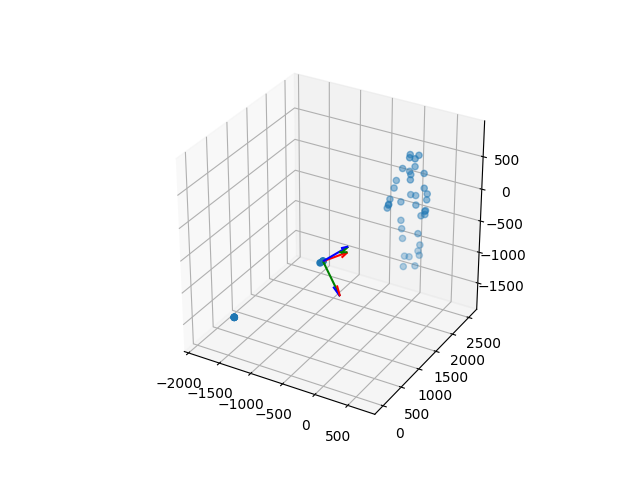

In [68]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

# ax.scatter(world_points[:, 0], world_points[:, 1], world_points[:, 2])
ax.scatter(p_all[:, 0], p_all[:, 1], p_all[:, 2])
# ax.scatter(cam_position[0], cam_position[1], cam_position[2])
    
T = cam_to_mark
# T[:3, :3] = np.eye(3)
# T[-1, -1] = 1

utils.plot_frame(ax, T)
utils.set_axes_equal(ax)

plt.show()


In [41]:
T

array([[ 8.11383507e-01,  5.67739503e-01,  1.39027555e-01,
        -1.60589071e+03],
       [-1.42455860e-01, -3.86067602e-02,  9.89047949e-01,
        -1.19080387e+02],
       [ 5.66888994e-01, -8.22302484e-01,  4.95529305e-02,
        -1.30794422e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.00000000e+00]])

In [42]:
plt.close()

In [43]:
dvs_frame = np.copy(labeler.dvs_frames[f_id])
dvs_frame_undistort = cv2.undistort(dvs_frame, proj_helper.K, proj_helper.D)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


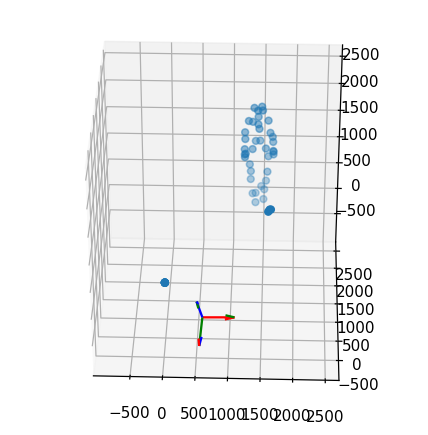

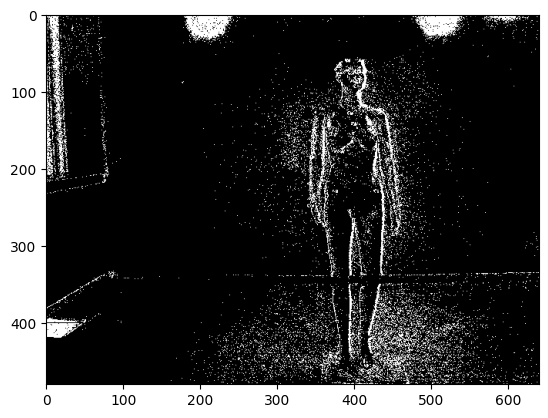

In [44]:
%matplotlib inline
fig = plt.figure()
plt.imshow(dvs_frame[:, :, :])


In [45]:
P_id = np.block(
    [np.eye(3), np.zeros((3, 1))]
)
print(P_id)
projected_points = (proj_helper.K @ P_id @ mark_to_cam @ world_points[:13].transpose()).transpose()
for p in projected_points:
    p /= p[-1]

print(projected_points)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[ 1.43795562e+02  2.10340939e+02  1.00000000e+00]
 [ 1.91324546e+02  2.43393640e+02  1.00000000e+00]
 [ 2.20404627e+02  1.54268273e+02  1.00000000e+00]
 [ 2.25561903e+02  1.40948088e+02  1.00000000e+00]
 [ 2.63410647e+02  8.34763589e+01  1.00000000e+00]
 [ 2.78564303e+02  9.62079231e+01  1.00000000e+00]
 [ 1.98881309e+02  1.13915961e+02  1.00000000e+00]
 [ 1.45078312e+02  1.54204838e+02  1.00000000e+00]
 [ 1.59653087e+02  1.37766702e+02  1.00000000e+00]
 [ 2.36183311e+02  2.26951331e+02  1.00000000e+00]
 [ 2.27022086e+02  2.43855269e+02  1.00000000e+00]
 [ 7.06771373e+01  3.06720806e+02  1.00000000e+00]
 [ 3.06275238e+03 -4.82490024e+00  1.00000000e+00]]


In [46]:
for i, p in enumerate(image_points[:13]):
    ip = image_points[i]
    x = int(ip[0])
    y = int(ip[1])
    cv2.circle(dvs_frame, (x, y), 4, (255, 0, 0), -1)
    tp = projected_points[i]
    tx = int(tp[0] / tp[-1])
    ty = int(tp[1] / tp[-1])
    # tx = int(tp[0])
    # ty = int(tp[1])
    cv2.circle(dvs_frame, (tx, ty), 3, (0, 0, 255), -1)

    cv2.line(dvs_frame, (x, y), (tx, ty), (0, 255, 0), 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


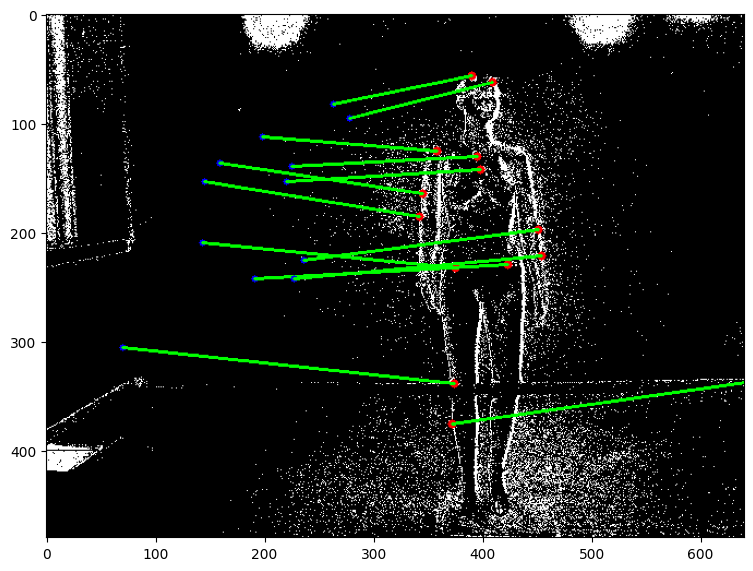

In [47]:
%matplotlib inline
plt.figure(figsize=(9, 12))
plt.imshow(dvs_frame)

In [30]:
test = mark_to_cam @ w_to_mark

In [31]:
R = test[:3, :3]

In [32]:
Rotation.from_matrix(R).as_euler('xyz')

array([ 1.69152016,  0.21596127, -0.1005625 ])

In [33]:
test[:, -1]

array([-451.37918536, -139.47748868,  859.3102341 ,   -1.        ])